<center><h1>Estudo de caso The News</h1></center>

*Gabriel João Dalla Nora*

Essa análise de dados é feita para a etapa de **Business Case** do processo seletivo para o cargo de **Analista de Dados** na <a href=https://thenewscc.com.br>The News</a>.

# Sumário

* [1. Análise exploratória de dados](#1.-Análise-exploratória-de-dados)
    * [1.1 Alterando o tipo dos dados](#1.1-Alterando-o-tipo-dos-dados)
<br></br>
* [2. Visualização dos dados](#2.-Visualização-dos-dados)
    * [2.1 Principais canais de aquisição](#2.1-Principais-canais-de-aquisição)
    * [2.2 Principais cadernos de notícias](#2.2-Principais-cadernos-de-notícias)
    * [2.3 Quantidade de leitores por caderno de notícias e canais de aquisição](#2.3-Quantidade-de-leitores-por-caderno-de-notícias-e-canais-de-aquisição)
    * [2.4 Leitura de notícias enviadas por caderno de notícias](#2.4-Leitura-de-notícias-enviadas-por-caderno-de-notícias)
    * [2.5 Análise temporal de leitores](#2.5-Análise-temporal-de-leitores)
        * [2.5.1 Número de cadastros por Newsletter mensal](#2.5.1-Número-de-cadastros-por-Newsletter-mensal)
        * [2.5.2 Número de cadastros por Canal de Aquisição mensal](#2.5.2-Número-de-cadastros-por-Canal-de-Aquisição-mensal)
        * [2.5.3 Taxa de abertura de e-mails conforme a data de cadastro](#2.5.3-Taxa-de-abertura-de-e-mails-conforme-a-data-de-cadastro)
        * [2.5.4 Data de últimas visitas por usuários](#2.5.4-Data-de-últimas-visitas-por-usuários)
        * [2.5.5 Data de últimas visitas por usuários para cada Newsletter](#2.5.5-Data-de-últimas-visitas-por-usuários-para-cada-Newsletter)
        * [2.5.6 Data de últimas visitas por usuários para cada Canal de Aquisição](#2.5.6-Data-de-últimas-visitas-por-usuários-para-cada-Canal-de-Aquisição)
<br></br>
* [Conclusões](#Conclusões)

## 1. Análise exploratória de dados

Nesta seção, irei utilizar das bibliotecas Pandas e do IPython para carregar, limpar e visualizar a tabela de dados.

In [1]:
# Bibliotecas utilizadas.
from IPython.display import display
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
#Configurações
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
# Após fazer o download do arquivo enviado, coloquei-o na mesma pasta do notebook que estou utilizando.
caminho_dados = "DataSetTheNews.json"
dados_originais = pd.read_json(caminho_dados)
dados_originais.head(7)

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
0,Chaddy,Smithe,csmithe0@census.gov,24/01/2022,23/09/2021,0.88,the news,GoogleAds
1,Shir,Halloran,shalloran1@narod.ru,10/07/2021,02/01/2022,0.02,the bizness,Referral
2,Gusti,Schwanden,gschwanden2@feedburner.com,01/05/2022,04/08/2021,0.81,the champs,Referral
3,Ted,Kettles,tkettles3@noaa.gov,15/05/2022,15/03/2022,0.20,the bizness,Referral
4,Virginia,Glencorse,vglencorse4@redcross.org,26/06/2022,22/02/2022,0.99,the news,Referral
5,Bruno,Balbeck,bbalbeck5@home.pl,19/10/2021,24/09/2021,0.90,the news,Referral
6,Kev,Duncombe,kduncombe6@marketwatch.com,03/05/2022,12/06/2022,0.15,the news,Organic


Com os dados carregados, começarei a obter informações a respeito do mesmo.

In [4]:
dados_originais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     973 non-null    object 
 1   last_name      939 non-null    object 
 2   email          973 non-null    object 
 3   Entry Date     939 non-null    object 
 4   Last Opened    939 non-null    object 
 5   Open Rate      939 non-null    float64
 6   Newsletter     939 non-null    object 
 7   Entry Channel  939 non-null    object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


Aqui tem dois pontos que merecem a devida atenção:

Primeiramente, temos 1000 entradas nos dados, porém os dados não estão completos apresentando alguns valores nulos. Como esses valores nulos representam, aparentemente, 61 entradas em diversas partes da tabela acredito que eles sejam todos os mesmos dados, caso essa hipótese seja comprovada verdadeira irei eliminá-los do dataset. Aqui, ignorei os 27 possíveis valores nulos presentes nas colunas `first_name` e `email` visto que essas duas variáveis não afetam na assinatura ou não do serviço, ainda assim eles seguem a mesma ideia de resultados "iguais", portanto também espero que eles sejam os mesmos dados, isto é se o dado não apresenta o "first name" ele não irá apresentar o "email".

Em seguida, podemos notar que os dados `Entry Date` e `Last Opened` são do tipo objeto, contudo eles representam datas portanto deveriam ser do tipo datetipe. Assim, eles devem ser corrigidos.

In [5]:
#Em uma primeira análise, simplesmente observo a tabela.
with pd.option_context('display.max_rows', None,
                        'display.max_columns', None):
    display(dados_originais[dados_originais["Newsletter"].isnull()])

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
7,Natalya,None,nstalman7@canalblog.com,None,None,NaN,None,None
74,Marylin,None,mdurdle22@discuz.net,None,None,NaN,None,None
92,Hurlee,None,hleate2k@nationalgeographic.com,None,None,NaN,None,None
125,Derwin,None,droney3h@usa.gov,None,None,NaN,None,None
129,Gavrielle,None,ghudleston3l@newsvine.com,None,None,NaN,None,None
145,Hedvige,None,hclemmett41@cnet.com,None,None,NaN,None,None
163,Meara,None,mrustan4j@businessweek.com,None,None,NaN,None,None
165,Ania,None,aguilloud4l@wufoo.com,None,None,NaN,None,None
216,Rocky,None,rmalamore60@economist.com,None,None,NaN,None,None
227,None,None,None,None,None,NaN,None,None


In [6]:
# E agora, obtenho o tamanho dessa tabela.
dados_originais[dados_originais["Newsletter"].isnull()].shape

(61, 8)

Portanto, a primeira hipótese de que os 61 tipos de dados são os mesmos foi comprovada. Assim, irei remover esses dados do conjunto de dados de estudo visto que eles não acrescentam em nada na análise.

In [7]:
#Como irei começar a alterar os dados, crio uma cópia para evitar alterações nos dados originais.
dados_TN = dados_originais.dropna(axis=0, subset=["Newsletter"]).copy()
dados_TN.reset_index(drop=True,inplace=True) #Reset nos índices

In [8]:
dados_TN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     915 non-null    object 
 1   last_name      939 non-null    object 
 2   email          915 non-null    object 
 3   Entry Date     939 non-null    object 
 4   Last Opened    939 non-null    object 
 5   Open Rate      939 non-null    float64
 6   Newsletter     939 non-null    object 
 7   Entry Channel  939 non-null    object 
dtypes: float64(1), object(7)
memory usage: 58.8+ KB


Após uma primeira limpeza, olhemos agora para o caso de nomes e emails nulos. Veremos se esses dados são importantes ou não antes de eliminá-los. Contudo, é importante notar que o número de dados faltantes na coluna nome e email diminui de 27 dados para 24 dados, o que indica que deveriam existir linhas que não continham nenhuma informação. Ao olharmos a tabela anterior, podemos notar que essas linhas eram as de índice [227, 387, 648].

In [9]:
dados_TN[dados_TN["email"].isnull()]

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
121,None,Manuel,None,03/10/2021,30/06/2021,0.61,the news,Referral
141,None,Greeno,None,24/01/2022,15/02/2022,0.10,the stories,Influencer
150,None,Shoute,None,11/01/2022,28/02/2022,0.46,the news,Organic
153,None,Bellelli,None,19/07/2021,13/01/2022,0.87,the news,Referral
166,None,Zoppie,None,29/01/2022,06/03/2022,0.50,the stories,Influencer
174,None,Petric,None,23/10/2021,13/09/2021,0.31,the bizness,Organic
304,None,Siehard,None,07/10/2021,13/06/2022,0.48,the bizness,GoogleAds
330,None,Happer,None,29/09/2021,06/08/2021,0.38,the bizness,Insta
341,None,Prinett,None,27/09/2021,31/01/2022,0.61,the news,Insta
357,None,Denyukhin,None,10/07/2021,29/10/2021,0.15,the stories,Insta


In [10]:
dados_TN[dados_TN["email"].isnull()].shape

(24, 8)

A princípio esses dados estão "completos", se ignorarmos a falta do e-mail e o nome do usuário. Portanto, em um primeiro momento irei mantê-los e caso seja necessário utilizar o e-mail ou o nome irei removê-los. 

### 1.1 Alterando o tipo dos dados

Aqui, irei alterar os dados, utilizando o mesmo tipo de observação feita anteriormente. Ou seja, irei alterar:

* `Entry Date`: Tipo data;
* `Last Opened`: Tipo data;

Antes de começar essa análise eu irei fazer uma observação a respeito dos dados. Primeiramente, observemos as datas de cadastro dos dados originais.

In [11]:
dados_originais.head(15)

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel
0,Chaddy,Smithe,csmithe0@census.gov,24/01/2022,23/09/2021,0.88,the news,GoogleAds
1,Shir,Halloran,shalloran1@narod.ru,10/07/2021,02/01/2022,0.02,the bizness,Referral
2,Gusti,Schwanden,gschwanden2@feedburner.com,01/05/2022,04/08/2021,0.81,the champs,Referral
3,Ted,Kettles,tkettles3@noaa.gov,15/05/2022,15/03/2022,0.20,the bizness,Referral
4,Virginia,Glencorse,vglencorse4@redcross.org,26/06/2022,22/02/2022,0.99,the news,Referral
5,Bruno,Balbeck,bbalbeck5@home.pl,19/10/2021,24/09/2021,0.90,the news,Referral
6,Kev,Duncombe,kduncombe6@marketwatch.com,03/05/2022,12/06/2022,0.15,the news,Organic
7,Natalya,None,nstalman7@canalblog.com,None,None,NaN,None,None
8,Cindy,Klimushev,cklimushev8@va.gov,15/06/2022,24/07/2021,0.33,the stories,GoogleAds
9,Kelila,Hek,khek9@trellian.com,26/01/2022,19/12/2021,0.98,the news,GoogleAds


Vamos analisar isso termo a termo.

* Índice 0: Para o cliente "Chaddy Smithe", podemos ver que ele se cadastrou em 2022 porém o último e-mail aberto foi em 2021. Isso parece não fazer tanto sentido para mim, em minha cabeça eu espero que o cliente já tenha um cadastro feito para que possamos ter dados a respeito da quantidade de e-mails abertos. Assim, o fato de termos dados onde o ano de cadastro ocorre após o ano de abertura do último e-mail me parece de certa forma errada.

* Índices 1, 6, 11, 13, 14: Aqui podemos ver o caso esperado, que é o caso esperado onde a data de cadastro ocorre antes do último e-mail aberto. 

* Índices 2, 3, 4, 5, 8, 9, 10, 12: Apresentam o mesmo tipo de erro, ou ao menos semelhante, ao índice 0. Onde pode ser o problema no ano ou no mês.

Como eu, até agora, não alterei as datas então esse problema foi passado para o dataset `dados_TN`, que é onde eu faço alterações nos dados. Aqui eu tenho diversas maneiras de trabalhar com esses dados, mas citarei alguns:

* A maneira preguiçosa, pegar os dados errados e eliminá-los. 

* Eu poderia conversar com o time de TI a respeito desse problema e ver se talvez não seja um erro no banco de dados ou na extração dos dados. Caso seja, tentar resolver esse problema.

Aqui irei seguir a segunda maneira, onde supostamente conversei com o time de TI cuja resposta foi que o problema ocorreu na extração dos dados dessas duas colunas, que acabaram ficando "embaralhados". Assim, irei criar algumas funções para tentar alterar a ordem daqueles onde existem problemas.

In [12]:
#Em um primeiro momento, irei abrir o "Entry Date" em três colunas, uma com o dia, outra com o mês e a última com o ano.

#Para isso, irei criar uma função.
def cria_colunas(tipo,dataset,coluna):
    dataset[["%s_Mês"%(tipo),"%s_Ano"%(tipo)]] = dataset[coluna].str.split("/",expand=True)[[1,2]]
    dataset["%s_Mês-Ano"%(tipo)] = dataset["%s_Mês"%(tipo)]+"/"+dataset["%s_Ano"%(tipo)]
    return dataset
cria_colunas("Cadastro",dados_TN,"Entry Date")
cria_colunas("Abertura",dados_TN,"Last Opened")

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel,Cadastro_Mês,Cadastro_Ano,Cadastro_Mês-Ano,Abertura_Mês,Abertura_Ano,Abertura_Mês-Ano
0,Chaddy,Smithe,csmithe0@census.gov,24/01/2022,23/09/2021,0.88,the news,GoogleAds,01,2022,01/2022,09,2021,09/2021
1,Shir,Halloran,shalloran1@narod.ru,10/07/2021,02/01/2022,0.02,the bizness,Referral,07,2021,07/2021,01,2022,01/2022
2,Gusti,Schwanden,gschwanden2@feedburner.com,01/05/2022,04/08/2021,0.81,the champs,Referral,05,2022,05/2022,08,2021,08/2021
3,Ted,Kettles,tkettles3@noaa.gov,15/05/2022,15/03/2022,0.20,the bizness,Referral,05,2022,05/2022,03,2022,03/2022
4,Virginia,Glencorse,vglencorse4@redcross.org,26/06/2022,22/02/2022,0.99,the news,Referral,06,2022,06/2022,02,2022,02/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Ashla,Boulds,abouldsrn@army.mil,01/09/2021,05/06/2022,0.96,the champs,Facebook,09,2021,09/2021,06,2022,06/2022
935,Manya,Sainthill,msainthillro@wikia.com,27/01/2022,05/05/2022,0.93,the news,Organic,01,2022,01/2022,05,2022,05/2022
936,None,Fergusson,None,23/08/2021,17/02/2022,0.76,the news,Referral,08,2021,08/2021,02,2022,02/2022
937,Dianna,Beardsell,dbeardsellrq@nih.gov,24/06/2022,27/06/2022,0.70,the bizness,Insta,06,2022,06/2022,06,2022,06/2022


Esse passo não é estritamente necessário, mas irá auxiliar na criação de visualizações no futuro. É por isso que eu o fiz agora. Tendo feito isso, irei agora buscar quais dados são problemáticos e trocá-los se necessário.

Para achar esses dados, irei primeiramente alterar o tipo dos dados presentes nas colunas `Entry Date` e `Last Opened`.

In [13]:
dados_TN["Entry Date"] = pd.to_datetime(dados_TN["Entry Date"], format="%d/%m/%Y")
dados_TN["Last Opened"] = pd.to_datetime(dados_TN["Last Opened"], format="%d/%m/%Y")

In [14]:
dados_TN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_name        915 non-null    object        
 1   last_name         939 non-null    object        
 2   email             915 non-null    object        
 3   Entry Date        939 non-null    datetime64[ns]
 4   Last Opened       939 non-null    datetime64[ns]
 5   Open Rate         939 non-null    float64       
 6   Newsletter        939 non-null    object        
 7   Entry Channel     939 non-null    object        
 8   Cadastro_Mês      939 non-null    object        
 9   Cadastro_Ano      939 non-null    object        
 10  Cadastro_Mês-Ano  939 non-null    object        
 11  Abertura_Mês      939 non-null    object        
 12  Abertura_Ano      939 non-null    object        
 13  Abertura_Mês-Ano  939 non-null    object        
dtypes: datetime64[ns](2), floa

In [15]:
dados_TN = dados_originais.dropna(axis=0, subset=["Newsletter"]).copy()
dados_TN.reset_index(drop=True,inplace=True) #Reset nos índices
cria_colunas("Cadastro",dados_TN,"Entry Date")
cria_colunas("Abertura",dados_TN,"Last Opened")
dados_TN["Entry Date"] = pd.to_datetime(dados_TN["Entry Date"], format="%d/%m/%Y")
dados_TN["Last Opened"] = pd.to_datetime(dados_TN["Last Opened"], format="%d/%m/%Y")

In [16]:
for i in range(len(dados_TN)):
    if dados_TN["Entry Date"].loc[i]>dados_TN["Last Opened"].loc[i]:
        #Salvando valores para a troca
        Novo_Entry, Novo_Last = dados_TN["Last Opened"].loc[i], dados_TN["Entry Date"].loc[i]
        Nova_Entrada, Nova_Abertura = dados_TN["Abertura_Mês-Ano"].loc[i], dados_TN["Cadastro_Mês-Ano"].loc[i]
        dados_TN["Entry Date"].loc[i], dados_TN["Cadastro_Mês-Ano"].loc[i]  = Novo_Entry, Nova_Entrada
        dados_TN["Last Opened"].loc[i], dados_TN["Abertura_Mês-Ano"].loc[i] = Novo_Last, Nova_Abertura
    else:
        pass

dados_TN[["Cadastro_Mês","Cadastro_Ano"]] = dados_TN["Cadastro_Mês-Ano"].str.split("/",expand=True)
dados_TN[["Abertura_Mês","Abertura_Ano"]] = dados_TN["Abertura_Mês-Ano"].str.split("/",expand=True)

In [17]:
dados_TN.head(2)

,first_name,last_name,email,Entry Date,Last Opened,Open Rate,Newsletter,Entry Channel,Cadastro_Mês,Cadastro_Ano,Cadastro_Mês-Ano,Abertura_Mês,Abertura_Ano,Abertura_Mês-Ano
0,Chaddy,Smithe,csmithe0@census.gov,2021-09-23,2022-01-24,0.88,the news,GoogleAds,09,2021,09/2021,01,2022,01/2022
1,Shir,Halloran,shalloran1@narod.ru,2021-07-10,2022-01-02,0.02,the bizness,Referral,07,2021,07/2021,01,2022,01/2022


Muito bem, agora nossos resultados estão no tipo correto e com as datas corrigidas posso proseguir com a visualização dos dados.

## 2. Visualização dos dados

Nesta seção, irei utilizar das bibliotecas Matplotlib e do Seaborn para a visualização dos resultados.

### 2.1 Principais canais de aquisição

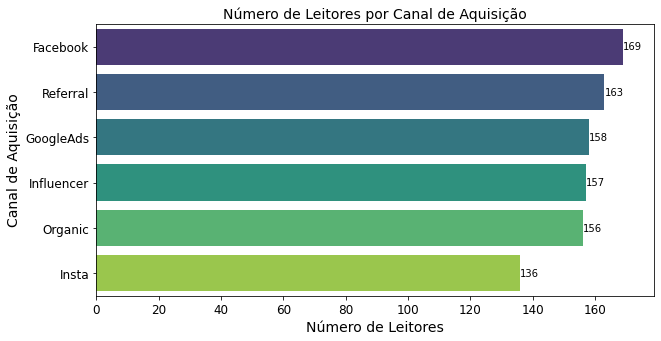

In [18]:
fonte = {"size":14}
plt.figure(figsize=(10,5))
ax = sns.countplot(data = dados_TN, y = "Entry Channel", palette = "viridis",
                   order = dados_TN.groupby(["Entry Channel"]).count()["Entry Date"].sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.ylabel("Canal de Aquisição",fontdict = fonte)
plt.xlabel("Número de Leitores",fontdict = fonte)
plt.xlim((0,179))
plt.title("Número de Leitores por Canal de Aquisição", fontdict = fonte)
plt.tick_params(labelsize=12)
plt.savefig("Imagens_TN/Num_Leit_por_Can_De_Aqui")
plt.show()

É fácil notar que o Facebook, seguido de indicações, são os canais que mais permitem adquirir clientes para o The News. Em seguida, temos o GoogleAds e Influencers como sendo plataformas praticamente empatadas na aquisição de clientes. Por fim, temos pesquisas orgânicas e o Instagram.

Olhando para os canais que podemos utilizar dinheiro para impulsionar a aquisição de clientes, o ideal seria investir mais no Facebook enquanto GoogleAds e Influencers estariam "pareados" numa questão de investimento, em uma visão de quanto gastar em cada e, por fim, ter um investimento menor no Instagram. Em um ponto mais adiante iremos analisar esses três métodos e quais os cadernos de notícias (newsletter ou boletim de notícias) são mais afetados por eles, assim é possível fazer um marketing mais direcionado visando melhores resultados.

Para referências, eventos onde os usuários ganham prêmios por um maior número de novos usuários convidados seria uma maneira de aumentar o número de assinaturas. Podemos tentar fazer com que o prêmio vá para o usuário que mais trouxe novos usuários ou criar marcos para indicações, onde cada novo marco alcançado liberaria novas recompensas que poderiam ser ganhar pelos usuários. Contudo, isso depende do quanto a empresa estaria disposta a gastar no evento, então talvez a melhor forma seria fazer esses eventos em datas especiais.

Por fim, os canais orgânicos são mais complicados, visto que esses requerem tempo e conteúdo para serem efetivos. Uma ideia que pode ser explorada seria um canal no Youtube, onde seriam colocados resumos sobre as 10 (ou 5, isso é algo que pode ser discutido) matérias mais lidas da semana ou do mês para cada caderno de notícias. Mais adiante, irei também analizar quais são as newsletters preferidas dos que encontraram o portal através desse método.

### 2.2 Principais cadernos de notícias

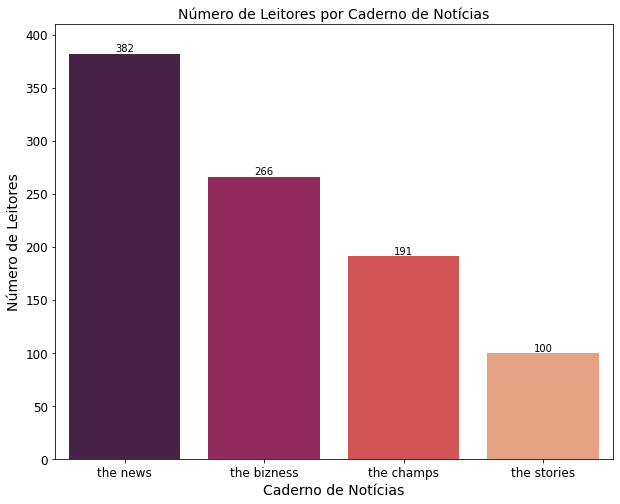

In [19]:
fonte = {"size":14}
plt.figure(figsize=(10,8))
ax = sns.countplot(data = dados_TN, x = "Newsletter", palette = "rocket")
ax.bar_label(ax.containers[0])
plt.xlabel("Caderno de Notícias",fontdict = fonte)
plt.ylabel("Número de Leitores",fontdict = fonte)
plt.ylim((0,410))
plt.title("Número de Leitores por Caderno de Notícias", fontdict = fonte)
plt.tick_params(labelsize=12)
plt.savefig("Imagens_TN/Num_Leit_por_Cad_De_Not.jpg")
plt.show()

### 2.3 Quantidade de leitores por caderno de notícias e canais de aquisição

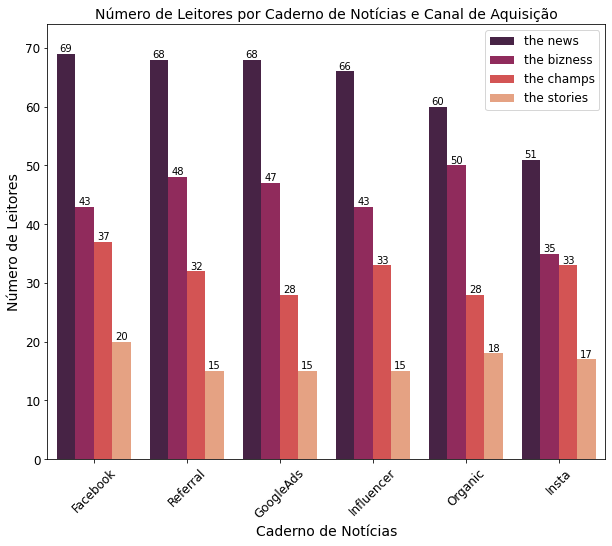

In [20]:
fonte = {"size":14}
plt.figure(figsize=(10,8))
ax = sns.countplot(data = dados_TN, x = "Entry Channel", palette = "rocket", hue="Newsletter",
                   order = dados_TN.groupby(["Entry Channel"]).count()["Entry Date"].sort_values(ascending=False).index)
for i in range(0,4):
    ax.bar_label(ax.containers[i])
ax.legend(bbox_to_anchor=(1,1),fontsize=12)
plt.xlabel("Caderno de Notícias",fontdict = fonte)
plt.ylabel("Número de Leitores",fontdict = fonte)
plt.ylim((0,74))
plt.title("Número de Leitores por Caderno de Notícias e Canal de Aquisição", fontdict = fonte)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.savefig("Imagens_TN/Num_Leit_por_Cad_De_Not_e_Can_De_Aqui")
plt.show()

Agora podemos fazer uma separação do quais cadernos de notícias deveríamos focar em campanhas de marketing pago. De maneira geral, seja no Facebook, através do GoogleAds, Influencers ou o Instagram as notícias que compõem o caderno "the news" são as mais procuradas pelos clientes. Seguida pelo "the bizness", "the champs" e o "the stories".

Assim, campanhas de marketing pago focando no "the news" e no "the bizness" seriam um bom foco para campanhas através do Facebook, do GoogleAds e de Influencers.

Contudo, a situação muda quando falamos do Instagram, ali a seção "the News" continua como sendo a mais importante, contudo o "the bizness" e o "the champs" estão praticamente "empatados" na aquisição de clientes. Assim no Instagram talvez impulsionar essas três newsletters seria uma boa ideia. 

Para um marketing orgânico, continuamos tendo a seção "the news" no topo, contudo nesse tipo de marketing a seção "the bizness" está logo atrás e é nessa mesma seção que ocorre um pico de aquisição de assinantes do boletim "the bizness", assim a criação de mais conteúdo com foco nessas duas seções possa gerar um maior efeito na aquisição de leitores.

### 2.4 Leitura de notícias enviadas por caderno de notícias

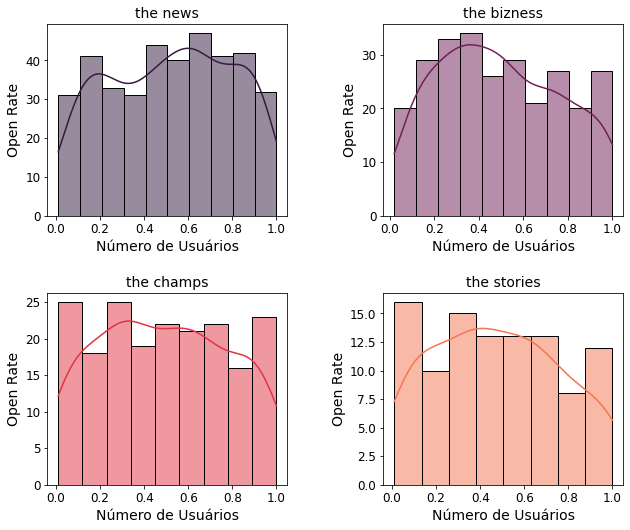

In [21]:
fonte = {"size":14}
def labels(i,j,x,y,titulo):
    axes[i,j].set_xlabel(x, fontdict=fonte)
    axes[i,j].set_ylabel(y, fontdict=fonte)
    axes[i,j].tick_params(labelsize=12)
    axes[i,j].set_title(titulo, fontdict=fonte)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)
cores = sns.color_palette("rocket", as_cmap=False)

#News
sns.histplot(data = dados_TN[dados_TN["Newsletter"] == "the news"], color=cores[0],
             x = "Open Rate", palette = "rocket", ax = axes[0,0], kde=True)
labels(0,0,"Número de Usuários","Open Rate","the news")

#Bizness
sns.histplot(data = dados_TN[dados_TN["Newsletter"] == "the bizness"], color=cores[1],
             x = "Open Rate", palette = "rocket", ax = axes[0,1], kde=True)
labels(0,1,"Número de Usuários","Open Rate","the bizness")

#Champs
sns.histplot(data = dados_TN[dados_TN["Newsletter"] == "the champs"], color=cores[3],
             x = "Open Rate", palette = "rocket", ax = axes[1,0], kde=True)
labels(1,0,"Número de Usuários","Open Rate","the champs")

#Stories
sns.histplot(data = dados_TN[dados_TN["Newsletter"] == "the stories"], color=cores[4],
             x = "Open Rate", palette = "rocket", ax = axes[1,1], kde=True)
labels(1,1,"Número de Usuários","Open Rate","the stories")

plt.savefig("Imagens_TN/Open_Rate_para_cada_Cad_De_Not")
plt.show()

Agora, podemos ver que a maioria dos leitores do "the news" leêm cerca de 60% a 70% das notícias enviadas a eles. Algo que me chamou atenção é que os leitores do "the bizness", que apresentam uma elevada taxa de retenção de leitores através do marketing orgânico, não costumam ler tanto as notícias enviadas, tendo seu pico de leitura em torno de 30% a 40%.

Temos os leitores do "the champs" lendo em torno de 20% a 30% com dois picos extremamente próximos, o primeiro estando entre nenhuma noticia lida e 10%, enquanto o segundo está entre 20% e 30%. Por fim temos o "the stories" que também apresenta dois picos próximos um do outro, o primeiro entre nenhuma notícia lida e 10%, enquanto o segundo também está entre 20% e 30%.

Uma análise mais detalhada dos dados poderia revelar quais são os tipos de notícias mais lidas em cada Newsletter, poderiamos então focar na criação de mais conteúdo relacionado. 

### 2.5 Análise temporal de leitores

Aqui irei utilizar da data de cadastro e do tipo de canal de aquisição para tentar ver como a passagem do tempo afetou a obtenção de leitores.

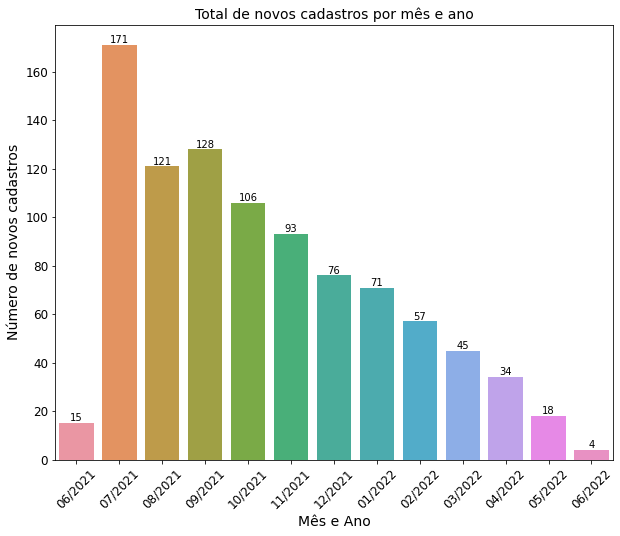

In [22]:
fonte = {"size":14}
plt.figure(figsize=(10,8))
ax = sns.countplot(data=dados_TN.sort_values(by=["Cadastro_Ano","Cadastro_Mês"]), x="Cadastro_Mês-Ano")
ax.bar_label(ax.containers[0])
plt.xlabel("Mês e Ano", fontdict=fonte)
plt.ylabel("Número de novos cadastros", fontdict=fonte)
plt.title("Total de novos cadastros por mês e ano", fontdict=fonte)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.savefig("Imagens_TN/ANT_Novos_Cadastros")
plt.show()

Interessantemente, podemos notar que com as datas corrigidas nós podemos notar um decrescimento no número de novos cadastros com a passagem do tempo.

É importante notar que no mês 06 de 2021 o número de cadastros também era baixo, apenas para aumentar no mês seguinte. Isso talvez possa ser um efeito sazonal, contudo com dados de apenas um ano eu fico impossibilitado de obter uma análise mais precisa.

#### 2.5.1 Número de cadastros por Newsletter mensal

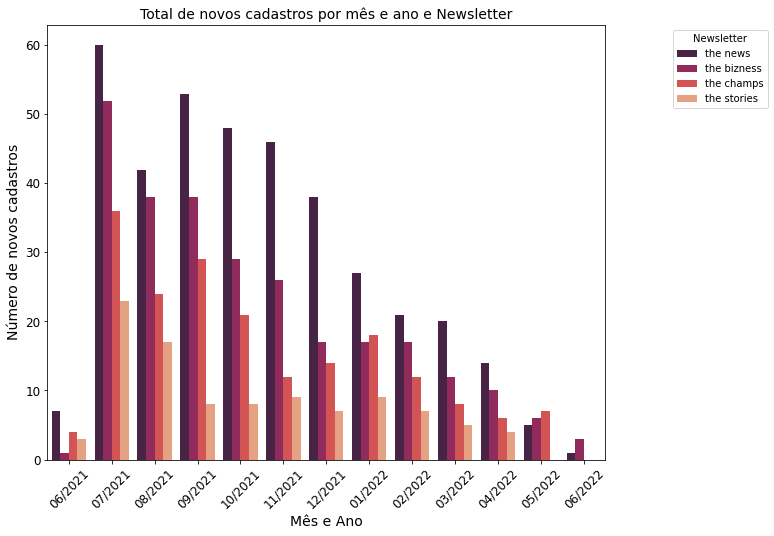

In [23]:
fonte = {"size":14}
plt.figure(figsize=(10,8))
sns.countplot(data=dados_TN.sort_values(by=["Cadastro_Ano","Cadastro_Mês"]), x="Cadastro_Mês-Ano", palette = "rocket", hue="Newsletter",
             hue_order=["the news","the bizness", "the champs", "the stories"])
plt.xlabel("Mês e Ano", fontdict=fonte)
plt.ylabel("Número de novos cadastros", fontdict=fonte)
plt.title("Total de novos cadastros por mês e ano e Newsletter", fontdict=fonte)
plt.legend(bbox_to_anchor=(1.3,1), title="Newsletter")
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.savefig("Imagens_TN/ANT_NC_MA_Newsletter")
plt.show()

Seguindo na linha da análise temporal, podemos notar que nos últimos dois mêses de 2022 (mês 05 e mês 06) o Newsletter "the news" apresentou, pela primeira vez, como sendo o newsletter menos assinado pelos leitores. Enquanto o "the champs" ultrapassou o "the bizness" e o "the stories" simplesmente desapareceu. Não foi possível encontrar nenhum padrão comportamental dos leitores olhando para o boletim de notícias que eles assinam.

#### 2.5.2 Número de cadastros por Canal de Aquisição mensal

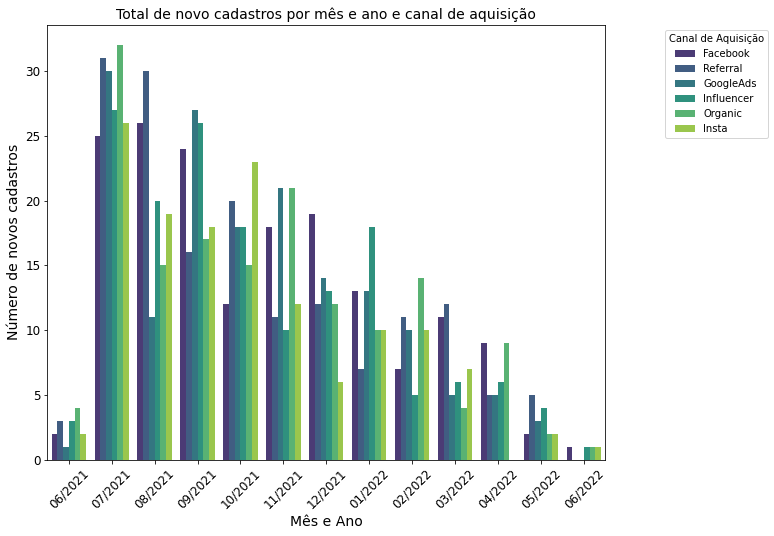

In [24]:
fonte = {"size":14}
plt.figure(figsize=(10,8))
ax = sns.countplot(data=dados_TN.sort_values(by=["Cadastro_Ano","Cadastro_Mês"]), x="Cadastro_Mês-Ano", palette = "viridis", hue="Entry Channel",
             hue_order=["Facebook","Referral","GoogleAds","Influencer","Organic","Insta"])
plt.xlabel("Mês e Ano", fontdict=fonte)
plt.ylabel("Número de novos cadastros", fontdict=fonte)
plt.title("Total de novo cadastros por mês e ano e canal de aquisição", fontdict=fonte)
plt.legend(bbox_to_anchor=(1.3,1), title="Canal de Aquisição")
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.savefig("Imagens_TN/ANT_NC_MA_Can_De_Aqui")
plt.show()

Enquanto na análise geral o Facebook foi o canal de aquisição mais eficiente da empresa podemos ver que mensalmente o mesmo não ocorre. Contudo, não é possível observar nenhum padrão comportamental tendo em vista o canal de aquisição do leitor.

#### 2.5.3 Taxa de abertura de e-mails conforme a data de cadastro

In [25]:
# Tentarei ver como a taxa de abertura se altera conforme o tempo passa. Para isso, crio primeiro uma lista com as datas ordenadas e depois agrupo 
#os dados por mês e ano de cadastro para em seguida ordenar esses resultados por ano e mês.
Datas_Sorted = list(dados_TN.sort_values(by=["Cadastro_Ano","Cadastro_Mês"])["Cadastro_Mês-Ano"].unique())
Sorting_Medias = dados_TN.groupby("Cadastro_Mês-Ano").mean().copy()

#Ordenando as datas;
Sorting_Medias["Ordenação"] = 0
ordem = {Datas_Sorted[i]:i for i in range(0,len(Datas_Sorted))}
for i in range(len(Datas_Sorted)):
    for j in range(len(Sorting_Medias)):
        if Datas_Sorted[i]==Sorting_Medias.index[j]:
            Sorting_Medias["Ordenação"][j] = ordem[Sorting_Medias.index[j]]
            break
        else:
            pass
Sorting_Medias.sort_values(by="Ordenação", inplace=True)

<ipython-input-26-aec73c00c3d4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels=Sorting_Medias.index, rotation=45, fontdict={"size":12})
<ipython-input-26-aec73c00c3d4>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels=Sorting_Medias.index, rotation=45, fontdict={"size":12})


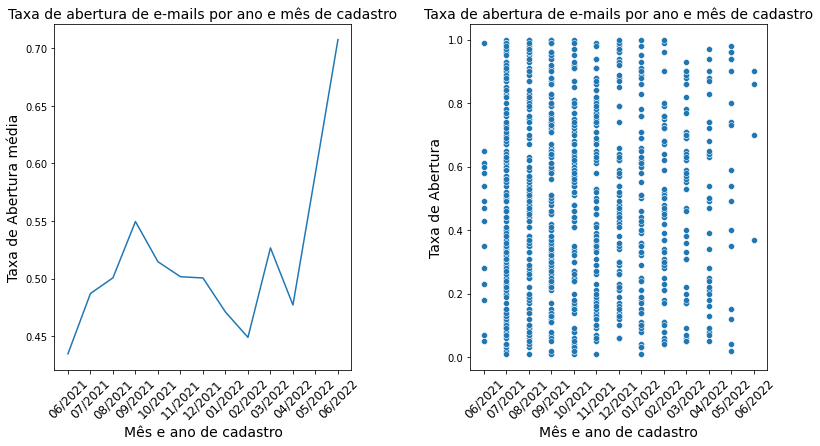

In [26]:
fonte = {"size":14}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
plt.subplots_adjust(left=0.01, bottom=0.1, 
                    right=1, top=0.9, 
                    wspace=0.4, hspace=0.4)

#Primeiro Gráfico
sns.lineplot(data = Sorting_Medias, x=Sorting_Medias.index, y = "Open Rate", ax = axes[0])
axes[0].set_xlabel("Mês e ano de cadastro", fontdict=fonte)
axes[0].set_ylabel("Taxa de Abertura média", fontdict=fonte)
axes[0].set_title("Taxa de abertura de e-mails por ano e mês de cadastro", fontdict=fonte)
axes[0].set_xticklabels(labels=Sorting_Medias.index, rotation=45, fontdict={"size":12})

#Segundo Gráfico
sns.scatterplot(data=dados_TN.sort_values(by=["Cadastro_Ano","Cadastro_Mês"]), x="Cadastro_Mês-Ano", y="Open Rate", ax=axes[1])
axes[1].set_xlabel("Mês e ano de cadastro", fontdict=fonte)
axes[1].set_ylabel("Taxa de Abertura", fontdict=fonte)
axes[1].set_title("Taxa de abertura de e-mails por ano e mês de cadastro", fontdict=fonte)
axes[1].set_xticklabels(labels=Sorting_Medias.index, rotation=45, fontdict={"size":12})

plt.savefig("Imagens_TN/ANT_Open_Rate_MAC")
plt.show()

Os dados aparentam mostrar um aumento do "Open Rate" no último mês, contudo temos pouquíssimos cadastros nesse período, portanto esse resultado pode ser questão da baixa quantidade de dados. Diferentemente da análise do número de cadastros temporal, a análise pelo taxa de emails abertos não indicou nenhum padrão comportamental.

#### 2.5.4 Data de últimas visitas por usuários

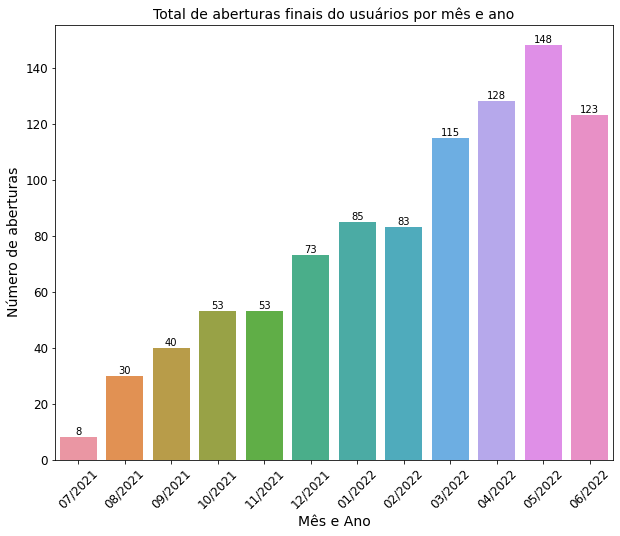

In [27]:
fonte = {"size":14}
plt.figure(figsize=(10,8))
ax = sns.countplot(data=dados_TN.sort_values(by=["Abertura_Ano","Abertura_Mês"]), x="Abertura_Mês-Ano")
ax.bar_label(ax.containers[0])
plt.xlabel("Mês e Ano", fontdict=fonte)
plt.ylabel("Número de aberturas", fontdict=fonte)
plt.title("Total de aberturas finais do usuários por mês e ano", fontdict=fonte)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.savefig("Imagens_TN/ANT_Aberturas_Finais_MA")
plt.show()

Devemos ter um cuidado aqui, no último mês nós temos a quantidade de usuários que abriram os e-mails para serem lidos, isso pode indicar a quantidade de usuários que continuam acompanhando o site através dos e-mails enviados e não o número de usuários que pararam de acompanhar os e-mails. Portanto, irei considerar que os usuários que abriram os emails no mês 06/2022 são usuários ainda ativos e usuários que não abriram neste mês são inativos. 

Assim, contrário ao decrescimento no número de cadastros, temos um crescimento no número de usuários ativos. Não obstante, podemos notar que nenhum usuário que se cadastrou no mês de 06/2021 fez sua última visita nesse mesmo mês.

#### 2.5.5 Data de últimas visitas por usuários para cada Newsletter

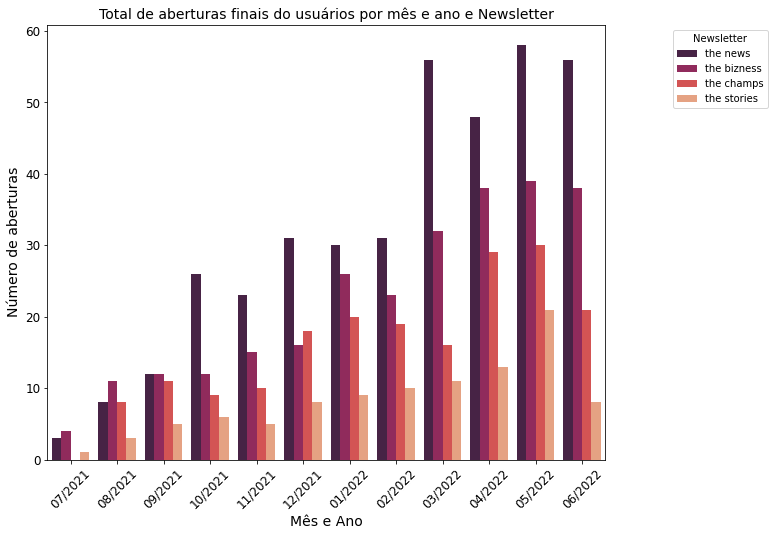

In [28]:
fonte = {"size":14}
plt.figure(figsize=(10,8))
sns.countplot(data=dados_TN.sort_values(by=["Abertura_Ano","Abertura_Mês"]), x="Abertura_Mês-Ano", palette = "rocket", hue="Newsletter",
             hue_order=["the news","the bizness", "the champs", "the stories"])
plt.xlabel("Mês e Ano", fontdict=fonte)
plt.ylabel("Número de aberturas", fontdict=fonte)
plt.title("Total de aberturas finais do usuários por mês e ano e Newsletter", fontdict=fonte)
plt.legend(bbox_to_anchor=(1.3,1), title="Newsletter")
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.savefig("Imagens_TN/ANT_AF_MA_Newsletter")
plt.show()

#### 2.5.6 Data de últimas visitas por usuários para cada Canal de Aquisição

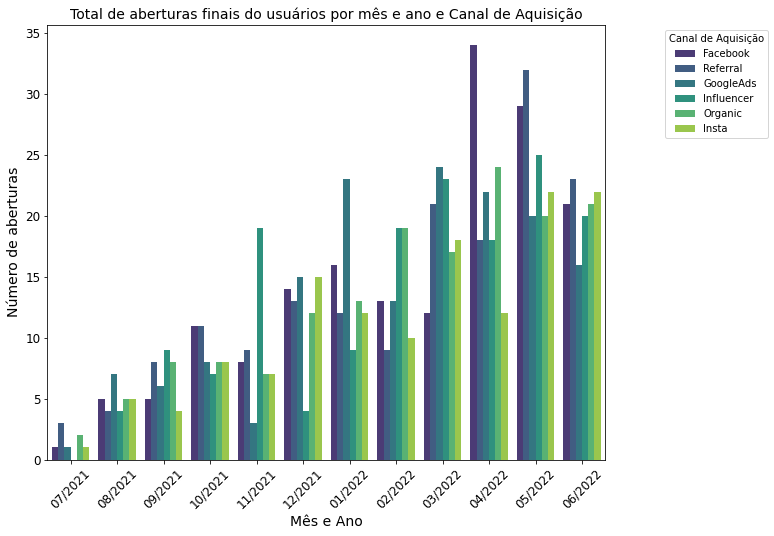

In [29]:
fonte = {"size":14}
plt.figure(figsize=(10,8))
ax = sns.countplot(data=dados_TN.sort_values(by=["Abertura_Ano","Abertura_Mês"]), x="Abertura_Mês-Ano", palette = "viridis", hue="Entry Channel",
             hue_order=["Facebook","Referral","GoogleAds","Influencer","Organic","Insta"])
plt.xlabel("Mês e Ano", fontdict=fonte)
plt.ylabel("Número de aberturas", fontdict=fonte)
plt.title("Total de aberturas finais do usuários por mês e ano e Canal de Aquisição", fontdict=fonte)
plt.legend(bbox_to_anchor=(1.3,1), title="Canal de Aquisição")
plt.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.savefig("Imagens_TN/ANT_AF_MA_Can_De_Aqui")
plt.show()

Exatamente como ocorreu para os dados obtidos por cadastro, não foi possível observar nenhum padrão comportamental nas últimas duas visualizações.

## Conclusões

Muito bem, para a organização da conclusão começo olhando para o comportamento dos usuários conforme a passagem do tempo, após isso falo sobre os achados a respeito das melhores plataformas de indicação e como podemos tentar resolver o problema da queda de leitores.

Preiramente, olhemos para o cadastro bruto de leitores conforme o tempo passa:

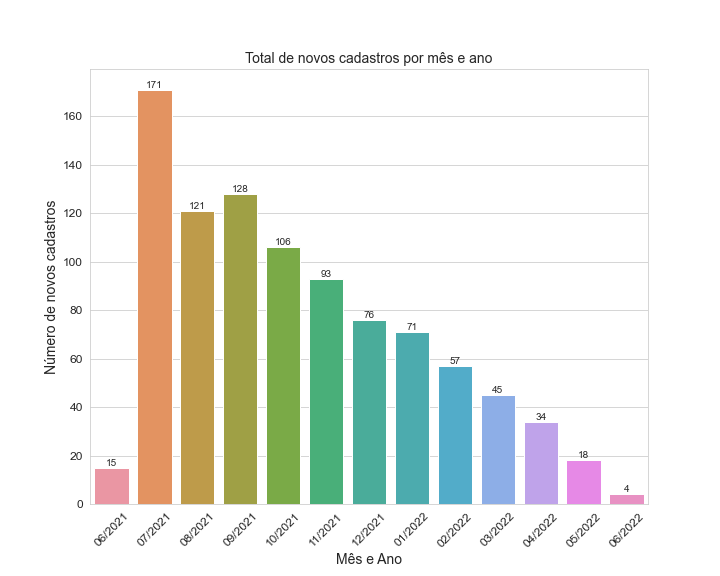

Podemos claramente ver uma diminuição no número de leitores com a passagem do tempo. É claro, talvez seja um efeito sazonal visto que no mês 06 do ano passado também houveram pouquíssimos novos usuários, contudo com os dados de um único ano não é possível ter uma conclusão a respeito da existência ou não de sazonalidade. 

Para corroborar a hipótese de que estamos perdendo usuários, vejamos as últimas datas de abertura de emails enviados aos usuários

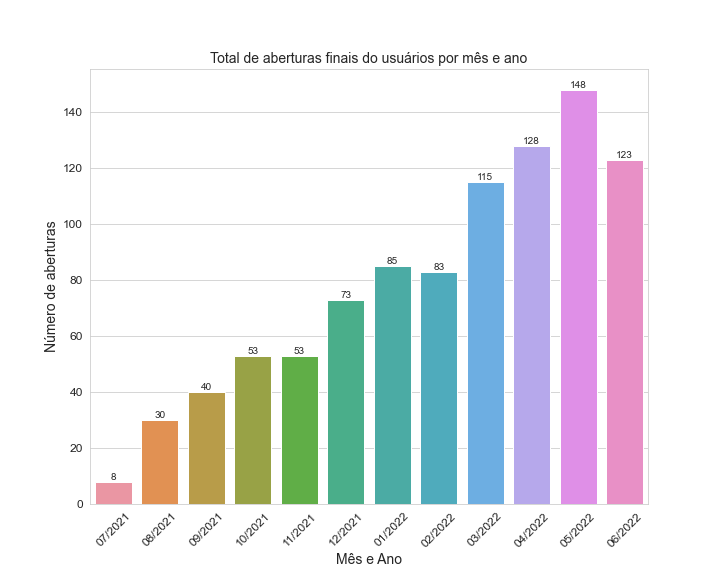

Devemos ter cuidado ao observar a última coluna, pois ela representa o mês atual, portanto podemos considerar esses usuários como ativos e como consequencia usuários que não entraram nesse mês serão inativos. É possível observar que a quantidade de usuários inativos aumenta com a passagem do tempo. Portanto, concluímos que estamos perdendo leitores conforme o tempo passa.

Assim, medidas de marketing pago, visando o curto prazo, deverão ser tomadas. Essas medidas visam um aumento na base de usuários. Mas, qual seria o melhor canal de aquisição para isso? 

Muito bem, olhemos para os principais canais de aquisição de usuários nesse período de um ano. 

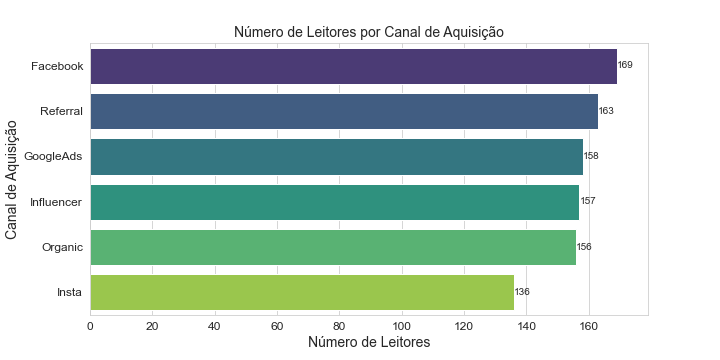

É possível notar que o Facebook é o canal de aquisição mais efetivo, seguido por referências pelos próprios usuários e em terceiro lugar temos o GoogleAds, que está praticamente empatado com os Influencers e com os leitores que chegaram ao site através de marketing Orgânico. Em último lugar, temos o Instagram.

Assim, podemos considerar campanhas de marketing pago com foco na plataforma do Facebook e do GoogleAds. Podemos também entrar em contato com influencers e negociar algum tipo de propaganda por parte deles. Por fim, devemos ter um foco menor no Instagram visto que ele atraí menos usuários. 

Para referências, eventos onde os usuários ganham prêmios por um maior número de novos usuários convidados seria uma maneira de aumentar o número de assinaturas. Podemos tentar fazer com que o prêmio vá para o usuário que mais trouxe novos usuários ou criar marcos para indicações, onde cada novo marco alcançado liberaria novas recompensas que poderiam ser ganhar pelos usuários. Contudo, isso depende do quanto a empresa estaria disposta a gastar no evento, então talvez a melhor forma seria fazer esses eventos em datas especiais.

Não obstante, estender o alcance da plataforma poderia auxiliar no marketing Orgânico. Poderíamos criar algum canal no Youtube ou no TikTok, ou ambos, onde compartilharíamos as notícias mais lidas do dia ou da semana, sendo a frequência de postagem algo a ser discutido. Isso demoraria a gerar resultados mas no futuro poderia auxiliar o veículo original de notícias.

Muito bem, agora que temos alguma ideia de onde poderíamos focar nossos resultados de marketing, quais os Newsletters que deveríamos levar em consideração para cada canal de aquisição? Bom, primeiramente vejamos quais os cadernos de notícias (ou Newsletters se preferirem) mais assinados de maneira geral e quais os mais assinados para cada canal de aquisição.

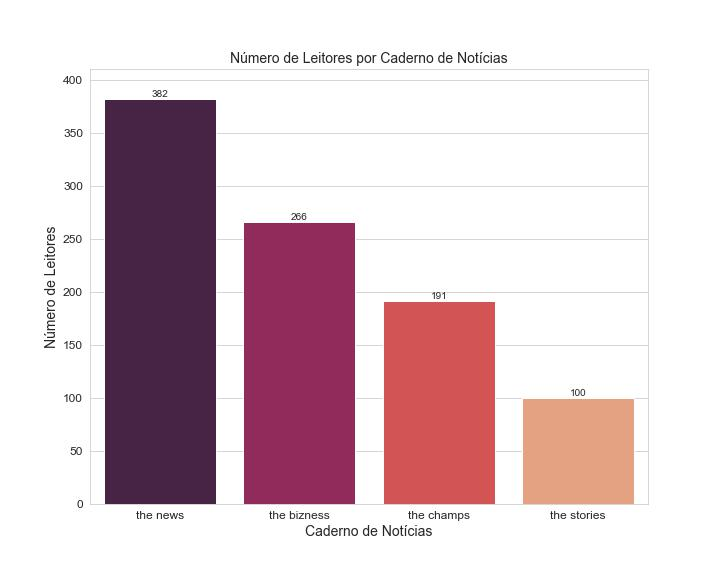

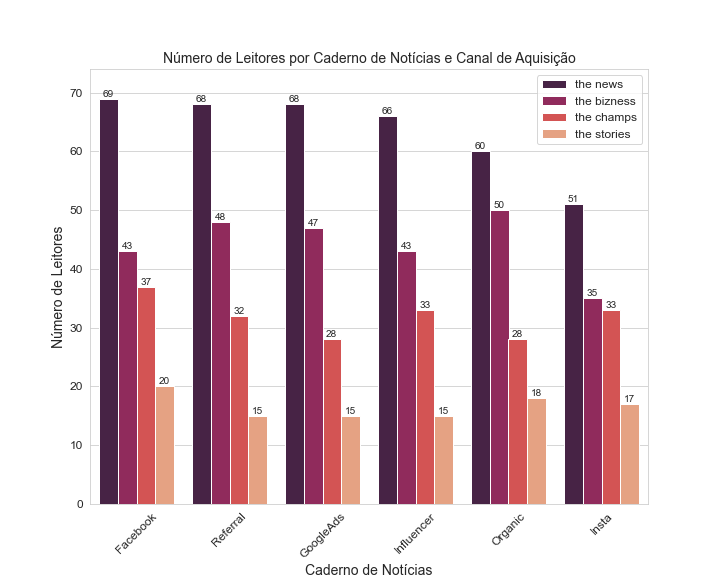

Portanto é fácil ver que o boletim "the news" e o boletim "the bizness" apresentam os dois maiores grupos de  leitores. Na maioria das plataformas um foco em ambos esses boletins seria desejável, contudo no Instagram temos que o boletim "The Champs" está praticamente empatado com o boletim "The Bizness", portanto especificamente no Instagram o foco poderia ser dividido em três. 

Surge também a questão de qual a taxa de abertura de e-mails pelos usuários de cada boletim. Vejamos:

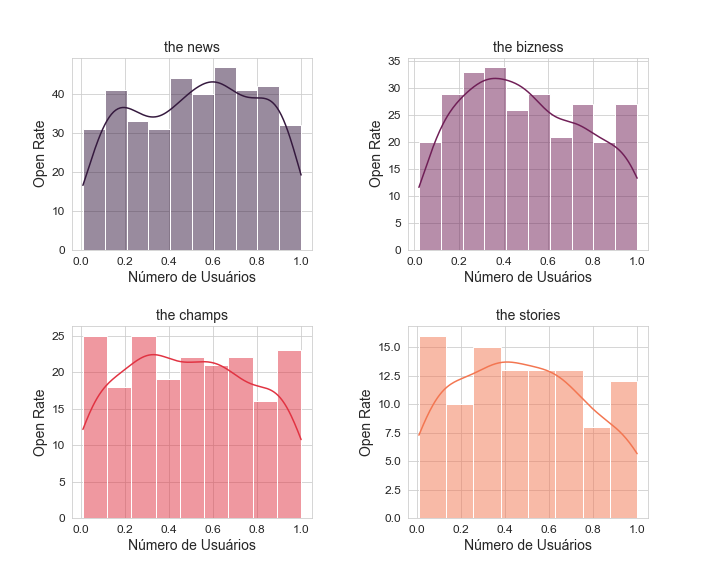

Podemos notar que a maioria dos usuários do caderno de notícias "the news" lê em torno de 60% a 70% dos emails lidos, apresentando a maior taxa de leitura de todas. 

Para o "the bizness" o pico ocorre entre 30% e 40%, tlvez criar mais conteúdo nessa área ou conteúdo mais aprofundado aumente a taxa de leitores. 

Temos também o "the champs" com dois picos extremamente próximos, um existindo nos usuários que não leem nenhum email e 10% dos enviados e outro nos usuários que leem entre 20% e 40%.

Por fim, os assinantes do "the stories" tem um pico nos usuários que não leem nenhum a 10% dos emails. 

Assim, espera-se que leitores do "the news" leiam mais notícias enviadas a eles, seguido dos leitores do "the bizness", "the champs" e por fim do "the stories".

Com os dados em mãos não estou possibilitado de fazer uma análise mais aprofundada. Porém, caso as notícias de cada boletim pudessem ser separados em determinadas categorias, seria possível analisar quais os tipos de notícias mais lidas e criar mais conteúdo focada nesses gêneros visando uma maior taxa de leitura por parte dos assinantes.